### Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

boston = load_boston()
boston_data = boston['data']
boston_feature_names = boston['feature_names']
boston_target = boston['target']

X = pd.DataFrame(boston_data, columns=boston_feature_names)
Y = pd.DataFrame(boston_target, columns=['price'])

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

In [4]:
check_test = pd.DataFrame({'Y_test': Y_test['price'], 'Y_pred': Y_pred.flatten()})

check_test.head()

,Y_test,Y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


In [5]:
check_test['error'] = check_test['Y_pred'] - check_test['Y_test']

check_test.head()

,Y_test,Y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [6]:
from sklearn.metrics import r2_score

lr_r2_score = r2_score(check_test['Y_test'], check_test['Y_pred'])
lr_r2_score

0.711226005748496

### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель
 LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

model.fit(X_train, Y_train.values[:, 0])

rfr_Y_pred = model.predict(X_test)

In [8]:
rfr_check_test = pd.DataFrame({'rfr_Y_test': Y_test['price'], 'rfr_Y_pred': rfr_Y_pred})

rfr_check_test.head()

,rfr_Y_test,rfr_Y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521


In [9]:
rfr_check_test['error'] = rfr_check_test['rfr_Y_pred'] - rfr_check_test['rfr_Y_test']

rfr_check_test.head()

,rfr_Y_test,rfr_Y_pred,error
173,23.6,22.806412,-0.793588
274,32.4,31.131464,-1.268536
491,13.6,16.339125,2.739125
72,22.8,23.810726,1.010726
452,16.1,17.139521,1.039521


In [10]:
rfr_r2_score = r2_score(rfr_check_test['rfr_Y_test'], rfr_check_test['rfr_Y_pred'])
rfr_r2_score

0.87472606157312

In [11]:
if rfr_r2_score >= lr_r2_score:
    print(f'В данном случае при данных параметрах RandomForestRegressor работает лучше, чем LinearRegression:')
    print(f' {rfr_r2_score} >= {lr_r2_score}')
else:
    print(f'В данном случае при данных параметрах LinearRegression работает лучше, чем RandomForestRegressor:')
    print(f' {rfr_r2_score} < {lr_r2_score}')

В данном случае при данных параметрах RandomForestRegressor работает лучше, чем LinearRegression:
 0.87472606157312 >= 0.711226005748496


### *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [12]:
RandomForestRegressor?

Feature: 0, Score: 0.03
Feature: 1, Score: 0.00
Feature: 2, Score: 0.01
Feature: 3, Score: 0.00
Feature: 4, Score: 0.01
Feature: 5, Score: 0.40
Feature: 6, Score: 0.01
Feature: 7, Score: 0.06
Feature: 8, Score: 0.01
Feature: 9, Score: 0.01
Feature: 10, Score: 0.02
Feature: 11, Score: 0.01
Feature: 12, Score: 0.42


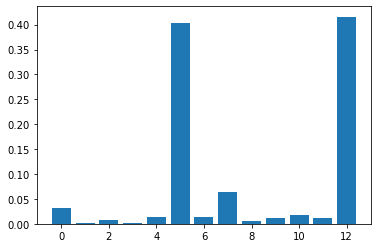

In [13]:
feat_imp = model.feature_importances_
feat_imp
for i, v in enumerate(feat_imp):
    print(f'Feature: {i}, Score: {v:.2f}')
    
from matplotlib import pyplot as plt
plt.bar([x for x in range(len(feat_imp))], feat_imp)
plt.show()
# 5 и 12

### *Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.

Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры: parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

df = pd.read_csv('creditcard.csv')

v_c = df.value_counts(normalize=True)
print(v_c)

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0        0.000063
          -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
y = df['Class']
X = df.drop('Class', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
print(f'X_train shape={X_train.shape}')
print(f'X_test shape={X_test.shape}')
print(f'y_train shape={y_train.shape}')
print(f'y_test shape={y_test.shape}')

X_train shape=(199364, 30)
X_test shape=(85443, 30)
y_train shape=(199364,)
y_test shape=(85443,)


In [18]:
parameters = [{
    'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)
}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3
)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [19]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

[[9.99070828e-01 9.29171738e-04]
 [9.99704794e-01 2.95206364e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]]


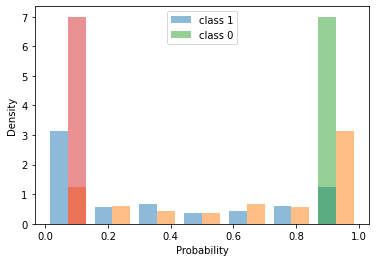

In [20]:
y_pred_proba = clf.predict_proba(X_test)

print(y_pred_proba[:10])

plt.hist(y_pred_proba[y_test == 1], bins=7, density=True, label='class 1', alpha=0.5)
plt.hist(y_pred_proba[y_test == 0], bins=7, density=True, label='class 0', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")

plt.legend()

In [21]:
from sklearn.metrics import roc_auc_score

y_pred_proba_ = y_pred_proba[:, 1]
print(y_pred_proba_[:5])

roc_auc_score(y_test, y_pred_proba_)

[0.00092917 0.00029521 0.00028215 0.00028215 0.00028215]


0.9462664156037156

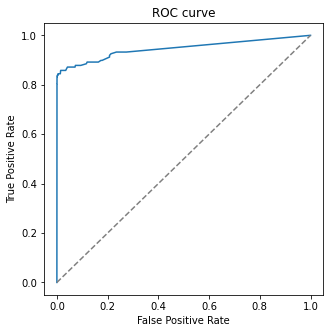

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_, pos_label=1)

plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()